# **Part 4 - Regression Model with Random Forest**

## **Computational Drug Discovery Bioinformatics Project**

In this part, we will be building a regression model of aromatase inhibitors using the random forest algorithm.

---

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
import pickle

## **Load Dataset**

In [ ]:
df = pd.read_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df.reset_index()
df

,index,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.623423
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.244125
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,2591,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.886057
2592,2592,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.886057
2593,2593,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.623788
2594,2594,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.958607


## **Features**

In the **Aromatase** dataset, the PubChem fingerprints act as the input features with the output variable being the $pIC_{50}$ values.

### **Input Features**

Let's extract the independent variable matrix $X$, containing the molecular descriptors.

In [ ]:
X = df.drop('pIC50', axis=1)
X

,index,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,2591,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,2592,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,2593,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2594,2594,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Output Features**

Now the dependent variable vector $Y$, containing the respective $pIC_{50}$ values for each molecule.

In [ ]:
Y = df.pIC50
Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2591    7.886057
2592    7.886057
2593    6.623788
2594    5.958607
2595    5.596708
Name: pIC50, Length: 2596, dtype: float64

Let's examine the dimensions of the matrices.

In [ ]:
X.shape

(2596, 882)

In [ ]:
Y.shape

(2596,)

### **Remove Low Variance Features**

Features with little variability in the data do not help the model in learning patterns, so we will remove them to increase accuracy.

In [ ]:
selection = VarianceThreshold(threshold=0.1)
X = selection.fit_transform(X)

We see that many low variance features removed as now there are far fewer columns than before.

In [ ]:
X.shape

(2596, 231)

## **Model**

The random forest machine learning approach which is a tree-based ensemble model that combines predictions from multiple models to attain a better overall performance than each of the individual underlying algorithms. Although there are a large number of voting rules that could be used, the baseline uses the majority rule, a simple and common method for classification.

<img src="https://qph.cf2.quoracdn.net/main-qimg-aa882166f1b75b6cd10cb88f3bdee7ab-lq"
alt="Random Forest Image"/>

We will build a regression model using the random forest framework. Since the dependent variable of $pIC_{50}$ to be predicted is continuous, we will implement a regressor but had our output been discrete, then a classifier would have been used instead.


### **Training**

Let's train a random forest with $500$ trees and fit it to the data with `random_state = 42` so we get the same score each time we train it.

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)

RandomForestRegressor(n_estimators=500, random_state=42)

The coefficient of determination $R^{2}$ shows how well an algorithm predicts the outcome of the dependent variable. The score we acheived is very high which implies that the model is able to learn and differentiate the patterns between descriptors quite well.

In [ ]:
R2 = model.score(X, Y)
R2

0.9448624310775247

### **Evaluation**

Now we will put the model to test and make some predictions.

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([4.98091243, 4.63165523, 6.8108943 , ..., 6.65456229, 6.26253337,
       5.97670873])

The Mean Squared Error (MSE) is a good performance metric that measures the average squared difference between the predicted and the actual target values. Our model acheived a lower score, suggesting minimal deviations between the predictions and the experimental values.

In [ ]:
mean_squared_error(Y, Y_pred)

0.09078737543216937

Let's create a scatter plot and compare experimental $pIC_{50}$ values with the predicted ones.

We can see that the data distribution is quite similar to the regressed diagonal line with a very high correlation coefficient. This shows that our model can predict within a good range of the actual value, which is much better than average and sufficient for the purposes of our project.

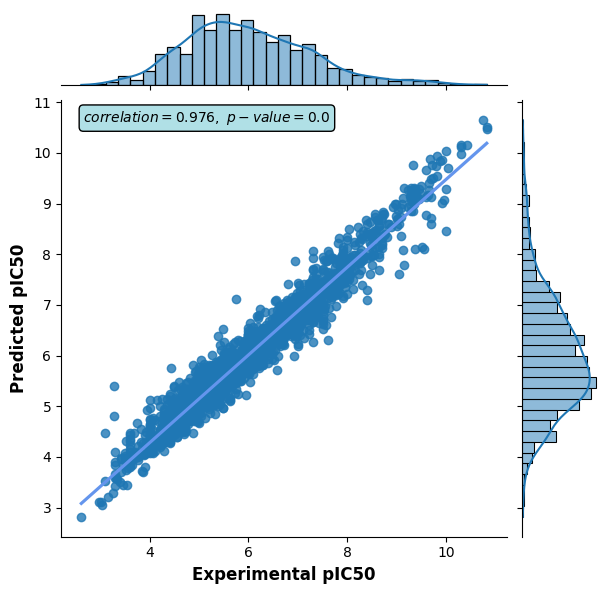

In [ ]:
correlation, p = stats.pearsonr(Y, Y_pred)

j = sns.jointplot(x=Y, y=Y_pred, kind='reg', joint_kws={'line_kws':{'color':'cornflowerblue'}})

j.set_axis_labels('Experimental pIC50', 'Predicted pIC50', fontsize='large', fontweight='bold')

j.ax_joint.annotate(f'$correlation = {correlation:.3f},\ p-value = {p:.1f}$', xy=(0.05, 0.95),
                    xycoords='axes fraction', bbox={'boxstyle':'round', 'fc':'powderblue'})
plt.show()

Let's save the model so that we can implement it into an app without having to train it.

In [ ]:
pickle.dump(model, open('aromatase_model.pkl', 'wb'))